# PROJECT 2: REGRESSION TASK

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import sklearn as sk

In [3]:
sea = pd.read_csv("seattle_01.csv")
sea.shape

(7576, 18)

In [6]:
sea.head(3)

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,2018-12-20 03:04:19.861014,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly


In [8]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 18 columns):
Unnamed: 0              7576 non-null int64
room_id                 7576 non-null int64
host_id                 7576 non-null int64
room_type               7576 non-null object
address                 7576 non-null object
reviews                 7576 non-null int64
overall_satisfaction    6103 non-null float64
accommodates            7576 non-null int64
bedrooms                7576 non-null float64
bathrooms               7574 non-null float64
price                   7576 non-null int64
last_modified           7576 non-null object
latitude                7576 non-null float64
longitude               7576 non-null float64
location                7576 non-null object
name                    7576 non-null object
currency                7576 non-null object
rate_type               7576 non-null object
dtypes: float64(5), int64(6), object(7)
memory usage: 858.3+ KB


In [9]:
sea.isnull().sum()

Unnamed: 0                 0
room_id                    0
host_id                    0
room_type                  0
address                    0
reviews                    0
overall_satisfaction    1473
accommodates               0
bedrooms                   0
bathrooms                  2
price                      0
last_modified              0
latitude                   0
longitude                  0
location                   0
name                       0
currency                   0
rate_type                  0
dtype: int64

In [10]:
sea.isnull().sum()/sea.isnull().count()*100

Unnamed: 0               0.000000
room_id                  0.000000
host_id                  0.000000
room_type                0.000000
address                  0.000000
reviews                  0.000000
overall_satisfaction    19.442978
accommodates             0.000000
bedrooms                 0.000000
bathrooms                0.026399
price                    0.000000
last_modified            0.000000
latitude                 0.000000
longitude                0.000000
location                 0.000000
name                     0.000000
currency                 0.000000
rate_type                0.000000
dtype: float64

In [11]:
sea[sea.overall_satisfaction.isnull()].head(5)

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
1,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
71,73,152568,734114,Entire home/apt,"Mercer Island, WA, United States",2,NaN,10,3.0,4.5,5900,2018-12-20 03:39:23.645473,47.592590,-122.246703,0101000020E6100000CE3461FBC98F5EC0E4F736FDD9CB...,Luxury Waterfront Mansion,USD,nightly
82,85,191795,928106,Entire home/apt,"Kirkland, WA, United States",2,NaN,12,4.0,2.5,250,2018-12-20 02:57:04.784282,47.722114,-122.222447,0101000020E6100000F98557923C8E5EC0EBFD463B6EDC...,"*Fully Stocked, Spacious 4BR Home*",USD,nightly
98,101,229990,1201633,Entire home/apt,"Seattle, WA, United States",1,NaN,9,2.0,2.0,150,2018-12-20 04:05:13.630547,47.578229,-122.411812,0101000020E61000006C06B8205B9A5EC0A54C6A6803CA...,Alki Beach 1/2 block to beach,USD,nightly
100,103,233502,1215564,Private room,"Seattle, WA, United States",1,NaN,2,1.0,1.0,60,2018-12-20 04:05:14.595473,47.573266,-122.374361,0101000020E610000076F9D687F5975EC051F4C0C760C9...,West Seattle room with private bath,USD,nightly


In [4]:
sea[sea.overall_satisfaction.isnull()]['room_type'].value_counts()
sea[sea.overall_satisfaction.isnull()]['reviews'].value_counts()

0    803
1    387
2    283
Name: reviews, dtype: int64

##### Most of the missing values come from Entire home/ apt as room_type and with reviews less than 2 so imputing the records with missing data with the median of the selected sample.

In [5]:
sea[(sea.overall_satisfaction.notnull()) & (sea.room_type == "Entire home/apt")].sort_values(by=['overall_satisfaction']).head(3)

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
4520,4749,21624980,114353388,Entire home/apt,"Seattle, WA, United States",3,2.5,2,1.0,1.0,84,2018-12-20 03:58:33.885051,47.613131,-122.349213,0101000020E6100000A3957B8159965EC0F7949C137BCE...,Breathtaking Elliott Avenue Studio Apartment b...,USD,nightly
1911,1999,11317746,25645421,Entire home/apt,"Kirkland, WA, United States",4,3.0,2,0.0,1.0,49,2018-12-20 02:53:55.625878,47.715843,-122.210510,0101000020E6100000C85EEFFE788D5EC0070951BEA0DB...,"Studio with Private bath, Kitchen, Entrance",USD,nightly
3208,3367,17478572,2115174,Entire home/apt,"Seattle, WA, United States",3,3.0,4,2.0,1.0,500,2018-12-20 03:30:17.32046,47.660752,-122.355662,0101000020E6100000849B8C2AC3965EC02062838593D4...,The Lighthouse - 2 Bed Apt. with Deck and View,USD,nightly


#### From this it is clear that the null values in overall_satisfaction come directly from values with reviews below 3. For this reason the records with null values in overall_satisfaction must be removed completely but also shouldn't effect the significant portion of the data. But for our analysis here I would be replacing them with a median of the records with Entire Home as the room_type.

In [6]:
sea['overall_satisfaction'] = sea['overall_satisfaction'].transform(lambda x:x.fillna(x.median())) 
sea = sea.dropna(how='any',axis=0)  

In [19]:
sea.isnull().sum()

Unnamed: 0              0
room_id                 0
host_id                 0
room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
last_modified           0
latitude                0
longitude               0
location                0
name                    0
currency                0
rate_type               0
dtype: int64

In [20]:
sea.rate_type.value_counts()

nightly    7574
Name: rate_type, dtype: int64

In [22]:
sea.currency.value_counts()

USD    7574
Name: currency, dtype: int64

In [7]:
#Dropping all the columns that aren't required for the analysis#
sea = sea.drop(['Unnamed: 0','room_id','host_id','last_modified', 'latitude','longitude','location','name','currency','rate_type' ], axis = 1)
se1 = sea
se1 = se1.drop(['room_type', 'address'],axis=1)
sea.head(5)

,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
0,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250
1,Entire home/apt,"Seattle, WA, United States",1,5.0,4,2.0,1.0,100
2,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82
3,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49
4,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90


In [8]:
ad = []

for row in sea['address']:
    try:
        ad.append(row.split(',')[0])
    except:
        ad.append(np.NaN)
sea['address'] = ad
a = sea.address.value_counts()
#"Medina", "Bothell", "Clyde Hill", "Kirkland", "Yarrow Point", "West Seattle",  "Tukwila", "Ballard", "Ballard Seattle", "Hunts Point", "Vashon", "Capitol Hill", "Washington"
sea.address[(sea.address == "Medina") | (sea.address == "Bothell") | (sea.address == "Clyde Hill") | (sea.address ==  "Yarrow Point") | (sea.address ==  "West Seattle") | (sea.address == "Tukwila") | (sea.address ==  "Ballard") | (sea.address ==  "Ballard Seattle") | (sea.address ==  "Hunts Point") | (sea.address ==  "Vashon") | (sea.address ==  "Capitol Hill") | (sea.address ==  "Washington")] = "Other"
sea = sea[sea.address != "西雅图"]
sea.address[sea.address == "Seattle "] = "Seattle"
sea.address[sea.address == 'Kirkland '] = "Kirkland"
sea.address.value_counts()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Seattle          6783
Bellevue          322
Kirkland          202
Redmond           110
Mercer Island      50
Newcastle          49
Renton             39
Other              18
Name: address, dtype: int64

# BASIC EDA

Text(0, 0.5, 'Price')

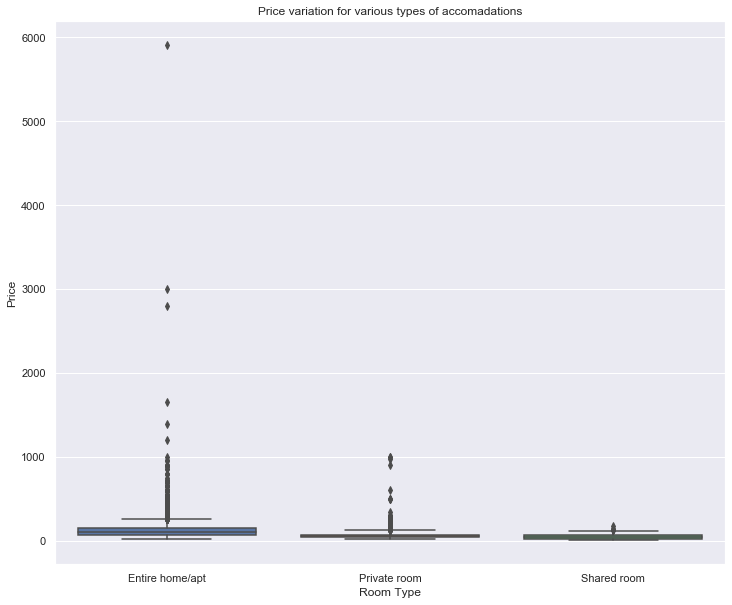

In [31]:
sns.set(rc={'figure.figsize':(12,10)})
bt = sns.boxplot(x = "room_type", y = "price", data = sea)
bt.set_title('Price variation for various types of accomadations')
bt.set_xlabel('Room Type')
bt.set_ylabel('Price')

Text(0, 0.5, 'Price')

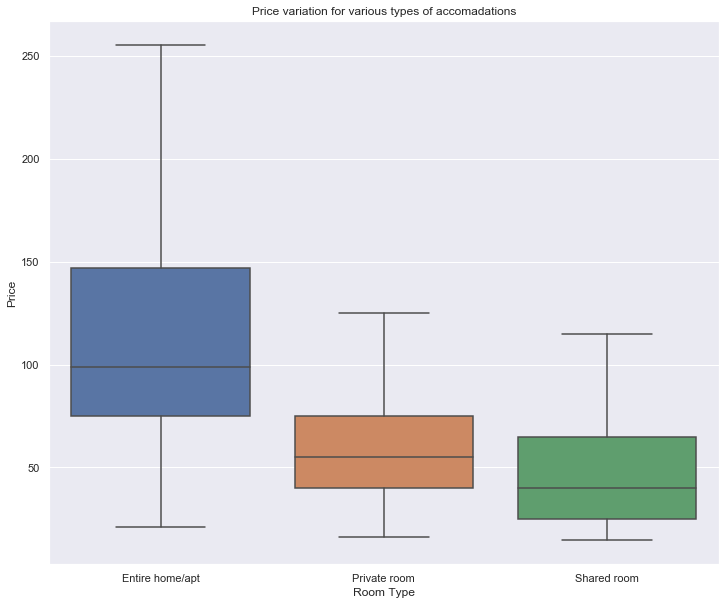

In [32]:
sns.set(rc={'figure.figsize':(12,10)})
bt = sns.boxplot(x = "room_type", y = "price", data = sea, showfliers = False)
bt.set_title('Price variation for various types of accomadations')
bt.set_xlabel('Room Type')
bt.set_ylabel('Price')

Text(0.5, 0, 'Price')

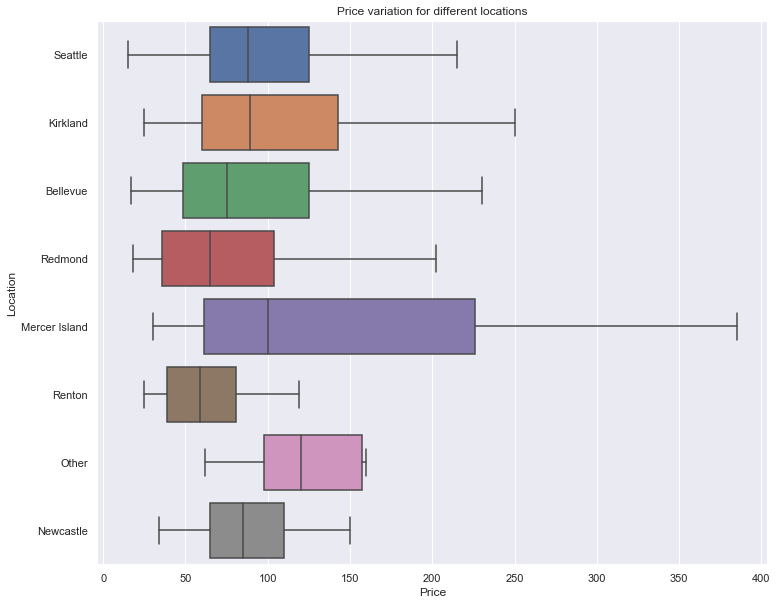

In [33]:
bt = sns.boxplot(y = "address", x = "price", data = sea, showfliers = False)
bt.set_title('Price variation for different locations')
bt.set_ylabel('Location')
bt.set_xlabel('Price')

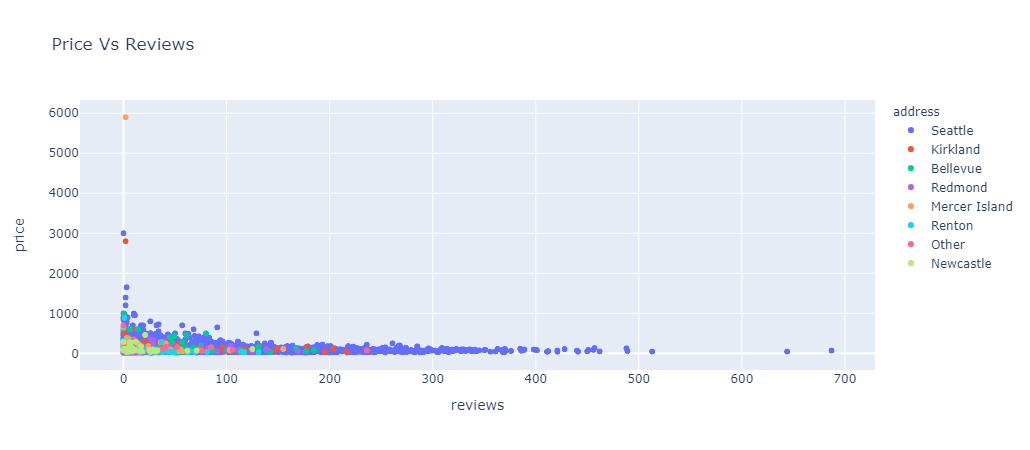

In [35]:
import plotly.express as px
fig = px.scatter(sea, x = "reviews", y = "price", color = "address", title='Price Vs Reviews').update_traces(marker=dict(
                              line=dict(color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

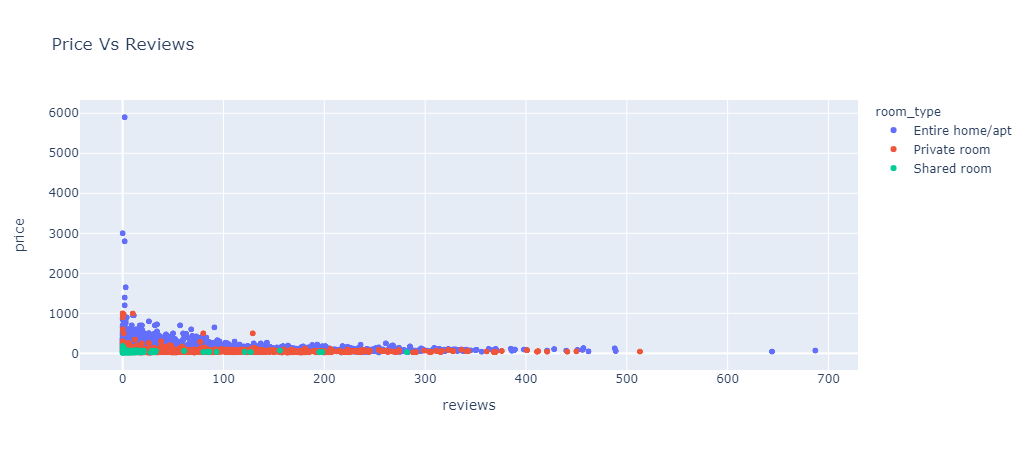

In [36]:
fig = px.scatter(sea, x = "reviews", y = "price", color = "room_type", title='Price Vs Reviews').update_traces(marker=dict(
                              line=dict(color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

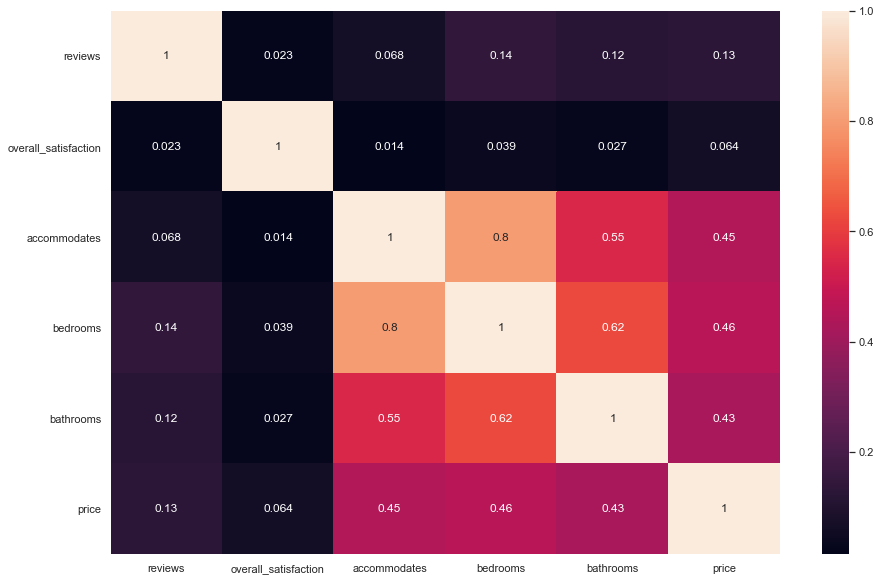

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(sea.corr().abs(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12952070>,
      dtype=object)

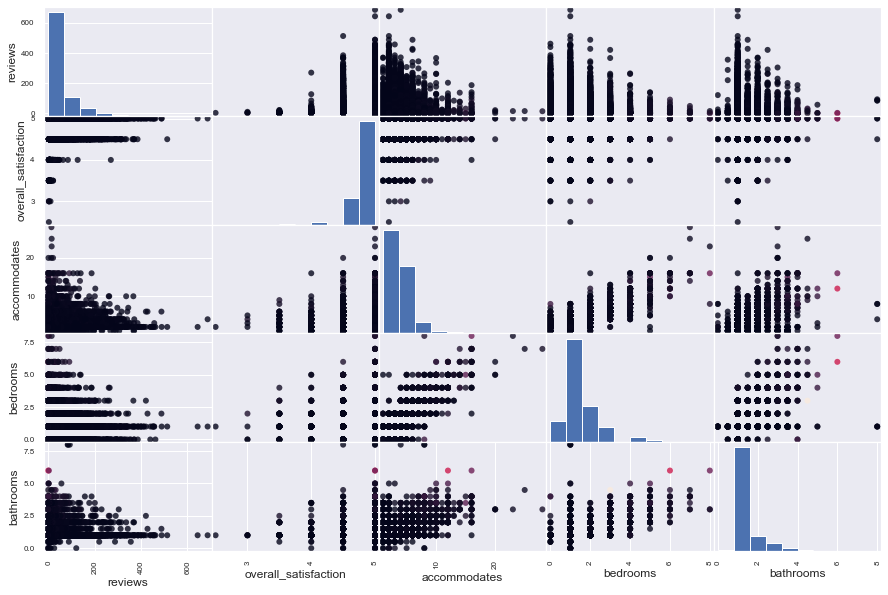

In [38]:
from pandas.plotting import scatter_matrix

attr = sea.columns[2:7]
scatter_matrix(sea[attr], figsize= (15, 10), c = sea.price, alpha = 0.8, marker= 'o')

In [9]:
#One Hot encoding
sea1 = sea.assign(
    rtd0 = lambda dataframe: dataframe['room_type'].map(lambda room_type: 1 if room_type == "Entire home/apt" else 0)
).assign(
    rtd1 = lambda dataframe: dataframe['room_type'].map(lambda room_type: 1 if room_type == "Private room" else 0)
).assign(    
    rtd2 = lambda dataframe: dataframe['room_type'].map(lambda room_type: 1 if room_type == "Shared room" else 0)
).assign(    
    ad0 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Seattle" else 0)
).assign(    
    ad1 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Bellevue" else 0)
).assign(    
    ad2 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Kirkland" else 0)
).assign(    
    ad3 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Redmond" else 0)
).assign(    
    ad4 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Mercer Island" else 0)
).assign(    
    ad5 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Newcastle" else 0)
).assign(    
    ad6 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Renton" else 0)
).assign(    
    ad7 = lambda dataframe: dataframe['address'].map(lambda address: 1 if address == "Other" else 0)
)

sea1.drop(['room_type', 'address', 'rtd2', 'ad7'],axis=1,inplace=True)
sea1=sea1.sample(n=1000, random_state=0)
sea1.head(7)

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,rtd0,rtd1,ad0,ad1,ad2,ad3,ad4,ad5,ad6
6497,29,5.0,2,0.0,1.0,65,0,1,1,0,0,0,0,0,0
231,62,5.0,2,1.0,1.5,60,0,1,1,0,0,0,0,0,0
5022,38,4.5,6,3.0,1.0,85,1,0,0,1,0,0,0,0,0
982,28,5.0,2,1.0,1.0,150,1,0,0,0,1,0,0,0,0
4829,0,5.0,3,1.0,1.0,70,1,0,1,0,0,0,0,0,0
5691,2,5.0,8,3.0,3.5,2800,1,0,0,0,1,0,0,0,0
4965,4,4.5,3,1.0,1.0,122,1,0,1,0,0,0,0,0,0


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
x = se1.drop(['price'],axis =1)
y = se1['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_train
X_test

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_train
X_test

array([[-0.28322338,  0.48428883, -0.7281225 , -1.37297407, -0.4783942 ],
       [ 0.22250086,  0.48428883, -0.7281225 , -0.37534164,  0.30333165],
       [-0.69699776,  0.48428883, -0.7281225 , -0.37534164, -0.4783942 ],
       ...,
       [-0.71232273,  0.48428883,  1.01360662,  0.62229079,  1.0850575 ],
       [-0.2678984 ,  0.48428883, -0.7281225 , -0.37534164, -0.4783942 ],
       [ 3.05762159,  0.48428883,  0.57817434,  0.62229079, -0.4783942 ]])

## Linear Regressor with Bagging

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=1000, max_samples=1000, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)
print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))


Train score: 0.24
Test score: 0.40


## KNN Regressor with Bagging

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=1000, max_samples=1000, bootstrap=True, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.34
Test score: 0.43


## Linear Regressor with Pasting

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lreg = LinearRegression()
bag_rgr = BaggingRegressor(lreg, n_estimators=1000, max_samples=1000, bootstrap=False, random_state=0)

bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)

print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.24
Test score: 0.40


## KNN Regressor with Pasting

In [57]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
bag_rgr = BaggingRegressor(knn_reg, n_estimators=1000, max_samples=1000, bootstrap=False, random_state=0)
bag_rgr.fit(X_train, y_train)
bag_rgr.score(X_test, y_test)


print('Train score: {:.2f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.34
Test score: 0.43


## Linear Regressor with ADA Boost

In [62]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(lreg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: -11.76
Test score: -24.03


## KNN Regressor with ADA Boost

In [60]:
knn_reg = KNeighborsRegressor()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.82
Test score: 0.15


## PCA

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [88]:
X_train = X_train_reduced
X_test = X_test_reduced
X_train.shape

(5680, 4)

# KNN REGRESSOR after PCA

Text(0, 0.5, 'MSE')

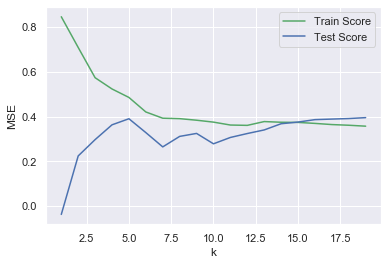

In [79]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [80]:
from sklearn.model_selection import GridSearchCV
param_grid_knn = {
            'n_neighbors' : range(1,20),
            'p': [1,2],
            'weights': ['distance','uniform'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:  2.1min


{'algorithm': 'ball_tree', 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 1520 out of 1520 | elapsed:  3.7min finished


In [107]:
from sklearn.model_selection import cross_val_score
knn_reg=KNeighborsRegressor(n_neighbors= 19,weights='uniform',algorithm='ball_tree',p=2)

score = cross_val_score(knn_reg, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(knn_reg, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

Average cross-validation training score: 0.31
Average cross-validation testing score: 0.41


# LINEAR REGRESSION after PCA

In [90]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)
print(lreg.score(X_train_reduced, y_train))
print(lreg.score(X_test_reduced, y_test))

score = cross_val_score(lreg, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(lreg, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

0.23860121524026245
0.40003456002182725
Average cross-validation training score: 0.29
Average cross-validation testing score: 0.40


# Ridge Regression after PCA

In [105]:
from  sklearn.linear_model import Ridge
ridge = Ridge(alpha = 100,fit_intercept= True, normalize= False)

score = cross_val_score(ridge, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(ridge, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

Average cross-validation training score: 0.29
Average cross-validation testing score: 0.40


# LASSO REGRESSION after PCA

In [102]:
from  sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10,fit_intercept= True, normalize= False)

score = cross_val_score(lasso, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(lasso, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

Average cross-validation training score: 0.29
Average cross-validation testing score: 0.40


# Polynomial Regression after PCA

In [109]:
from  sklearn.preprocessing  import PolynomialFeatures
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg = LinearRegression(copy_X= True,fit_intercept=True,normalize =False)

score = cross_val_score(lreg, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(lreg, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

Average cross-validation training score: 0.29
Average cross-validation testing score: 0.40


# Simple SVM Regressor Post PCA

Text(0, 0.5, 'Score')

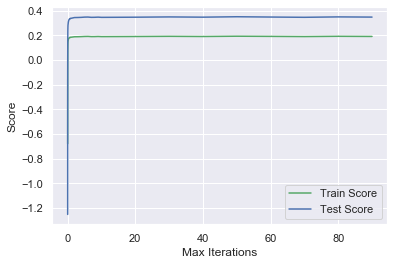

In [111]:
from sklearn.svm import SVR, LinearSVR

linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

train_score_array = []
test_score_array = []

for c in list(np.arange(0.001, 0.01, 0.001))+list(np.arange(0.01, 0.1, 0.01))+list(np.arange(0.1, 1, 0.1))+list(np.arange(1, 10, 1))+list(np.arange(10, 100, 10)):
    linear_svm = LinearSVR(C=c)
    linear_svm.fit(X_train, y_train)
    train_score_array.append(linear_svm.score(X_train, y_train))
    test_score_array.append(linear_svm.score(X_test, y_test))

x_axis = list(np.arange(0.001, 0.01, 0.001))+list(np.arange(0.01, 0.1, 0.01))+list(np.arange(0.1, 1, 0.1))+list(np.arange(1, 10, 1))+list(np.arange(10, 100, 10))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

In [112]:
param_grid_linearsvm = {
            'C' : list(np.arange(0.001, 0.01, 0.001))+list(np.arange(0.01, 0.1, 0.01))+list(np.arange(0.1, 1, 0.1))+list(np.arange(1, 10, 1))+list(np.arange(10, 100, 10))
            }

CV_linearsvm = GridSearchCV(estimator =linear_svm, param_grid = param_grid_linearsvm , return_train_score=True, verbose = 1, n_jobs = -1)
CV_linearsvm.fit(X_train, y_train)

best_parameters_linearsvm=CV_linearsvm.best_params_
print("Best parameter for Cost is: {}".format(best_parameters_linearsvm))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
c:\users\sushanth\appdata\local\programs\python\python36-32\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.3s


Best parameter for Cost is: {'C': 70}


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    5.2s finished


In [114]:
linear_svm = LinearSVR(C = 70)

score = cross_val_score(linear_svm, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(linear_svm, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

Average cross-validation training score: 0.25
Average cross-validation testing score: 0.38


# Kernal SVM REGRESSOR after PCA

### SVM with Linear Kernal

In [116]:
param_grid = {
            'C' : [0.001, 0.01, 0.1, 1, 10, 100],
            'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
            }

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train,y_train)

print("Best parameters for kernel linear: {}".format(grid_search.best_params_))


Best parameters for kernel linear: {'C': 100, 'gamma': 0.001}


In [118]:
kernelized_svr = SVR(C=100,gamma=0.001,kernel ='linear')

score = cross_val_score(kernelized_svr, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(kernelized_svr, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))


Average cross-validation training score: 0.25
Average cross-validation testing score: 0.38


### SVM with RBF Kernal

In [117]:
kernelized_svr = SVR(C=100,gamma=0.1,kernel ='rbf')

score = cross_val_score(kernelized_svr, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(kernelized_svr, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

Average cross-validation training score: 0.32
Average cross-validation testing score: 0.38


### SVM with Polynomial Kernal

In [119]:
kernelized_svr = SVR(C=100,gamma=0.01,kernel ='poly')

score = cross_val_score(kernelized_svr, X_train,y_train,cv=5)
print("Average cross-validation training score: {:.2f}".format(score.mean()))

score = cross_val_score(kernelized_svr, X_test,y_test,cv=5)
print("Average cross-validation testing score: {:.2f}".format(score.mean()))

Average cross-validation training score: 0.13
Average cross-validation testing score: 0.13


In [122]:
M_Summary = {'Model':['KNN','Linear Regression','Ridge','Lasso','Polynomial Regression' ,'Simple SVM','Linear Kernal SVM','RBF Kernal SVM', 'Polynomial Kernal SVM'],
    'Training Scores':['0.34', '0.29', '0.29', '0.28', '0.29', '0.26', '0.26', '0.31', '0.14'],
    'Training Scores after PCA':['0.31', '0.29', '0.29', '0.29', '0.29', '0.25', '0.25', '0.32', '0.13'],                  
    'Testing Scores':['0.40', '0.40', '0.39', '0.38', '0.39', '0.37', '0.37', '0.39', '0.13'],
    'Testing Scores after PCA':['0.41', '0.40', '0.40', '0.40', '0.40', '0.38', '0.38', '0.38', '0.13']
            }
M_Summary = pd.DataFrame(M_Summary)
M_Summary

,Model,Training Scores,Training Scores after PCA,Testing Scores,Testing Scores after PCA
0,KNN,0.34,0.31,0.40,0.41
1,Linear Regression,0.29,0.29,0.40,0.40
2,Ridge,0.29,0.29,0.39,0.40
3,Lasso,0.28,0.29,0.38,0.40
4,Polynomial Regression,0.29,0.29,0.39,0.40
5,Simple SVM,0.26,0.25,0.37,0.38
6,Linear Kernal SVM,0.26,0.25,0.37,0.38
7,RBF Kernal SVM,0.31,0.32,0.39,0.38
8,Polynomial Kernal SVM,0.14,0.13,0.13,0.13


#### The model performance improved after the use of PCA. It is not that significant as the there was only a varibale drop post PCA. On that being said, the model performance was enhanced in project 1, so performance of models in 2 is closely comparable with that of the former. 

## Deep learning models

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [24]:
# create model
model = Sequential()
model.add(Dense(3, input_dim=5, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=100)

Epoch 1/20
5680/5680 [==============================] - 0s 70us/sample - loss: 1063.5865 - acc: 0.0000e+00
Epoch 2/20
5680/5680 [==============================] - 0s 42us/sample - loss: 331.1133 - acc: 0.0000e+00
Epoch 3/20
5680/5680 [==============================] - 0s 40us/sample - loss: 283.3642 - acc: 0.0000e+00
Epoch 4/20
5680/5680 [==============================] - 0s 48us/sample - loss: 251.5384 - acc: 0.0000e+00
Epoch 5/20
5680/5680 [==============================] - 0s 35us/sample - loss: 217.5324 - acc: 0.0000e+00
Epoch 6/20
5680/5680 [==============================] - 0s 41us/sample - loss: 173.5441 - acc: 0.0000e+00
Epoch 7/20
5680/5680 [==============================] - 0s 47us/sample - loss: 124.2081 - acc: 0.0000e+00
Epoch 8/20
5680/5680 [==============================] - 0s 38us/sample - loss: 78.4451 - acc: 0.0000e+00
Epoch 9/20
5680/5680 [==============================] - 0s 40us/sample - loss: 29.9537 - acc: 0.0000e+00
Epoch 10/20
5680/5680 [========================

In [1]:
model.evaluate(X_test, y_test)
from sklearn.metrics import r2_score, recall_score, precision_score

In [26]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.73
Test score: -1.35
